In [1]:
import pandas as pd
import seaborn as sns

In [2]:
tips = sns.load_dataset('tips')
tips.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


1. 컬럼의 이름 변경 -> [총 금액, 팁, 성별, 흡연 여부, 요일, 시간, 인원]
2. 총 금액, 팁 컬럼의 데이터를 소수점 첫째 자리까지 유지 하고 반올림
3. 식사 인원, 성별에 따라 (그룹화) 팁의 비율의 평균 값을 구하고 시각화 (바형 그래프)

In [10]:
tips.columns = ['총 금액', '팁', '성별', '흡연 여부', '요일', '시간', '인원']
tips.head(1)

,총 금액,팁,성별,흡연 여부,요일,시간,인원
0,16.99,1.01,Female,No,Sun,Dinner,2


In [16]:
## case1 
round(tips['총 금액'], 1)

0      17.0
1      10.3
2      21.0
3      23.7
4      24.6
       ... 
239    29.0
240    27.2
241    22.7
242    17.8
243    18.8
Name: 총 금액, Length: 244, dtype: float64

In [20]:
## case2
tips[['총 금액', '팁']] = tips[['총 금액', '팁']].round(1)

In [21]:
tips.head(2)

,총 금액,팁,성별,흡연 여부,요일,시간,인원
0,17.0,1.0,Female,No,Sun,Dinner,2
1,10.3,1.7,Male,No,Sun,Dinner,3


In [22]:
## 팁 비율 = (팁 / 총 금액) * 100
tips['팁 비율'] = (tips['팁'] / tips['총 금액']) * 100

In [25]:
tips.head(2)

,총 금액,팁,성별,흡연 여부,요일,시간,인원,팁 비율
0,17.0,1.0,Female,No,Sun,Dinner,2,5.882353
1,10.3,1.7,Male,No,Sun,Dinner,3,16.504854


In [28]:
group_data = tips.groupby(['인원', '성별']).mean()['팁 비율']

C:\Users\intco\AppData\Local\Temp\ipykernel_44716\2528622873.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_data = tips.groupby(['인원', '성별']).mean()['팁 비율']


In [15]:
import matplotlib.pyplot as plt

<AxesSubplot: ylabel='인원,성별'>

C:\Users\intco\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:89: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from current font.
  func(*args, **kwargs)
C:\Users\intco\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:89: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  func(*args, **kwargs)
C:\Users\intco\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:89: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  func(*args, **kwargs)
C:\Users\intco\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:89: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  func(*args, **kwargs)
C:\Users\intco\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\intco\AppD

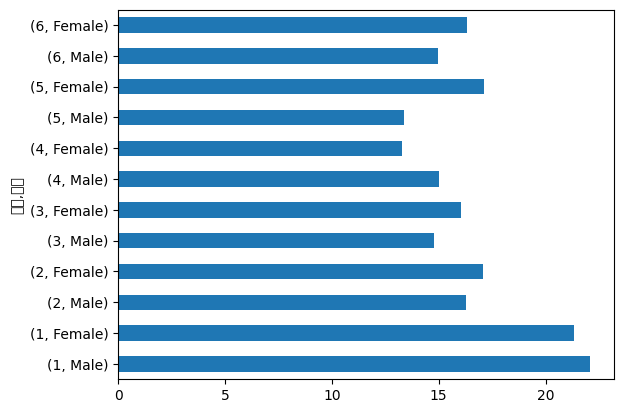

In [29]:
group_data.plot.barh()

In [30]:
import matplotlib.pyplot as plt

In [33]:
x = group_data.index
list_x = list(range(0, len(x), 1))
print(list_x)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [34]:
y = group_data.values

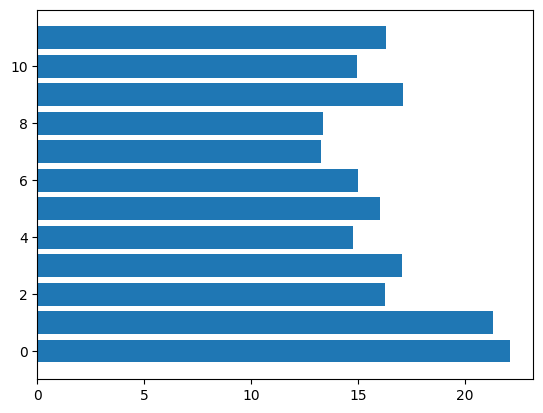

In [40]:
plt.barh(list_x, y)
plt.show()


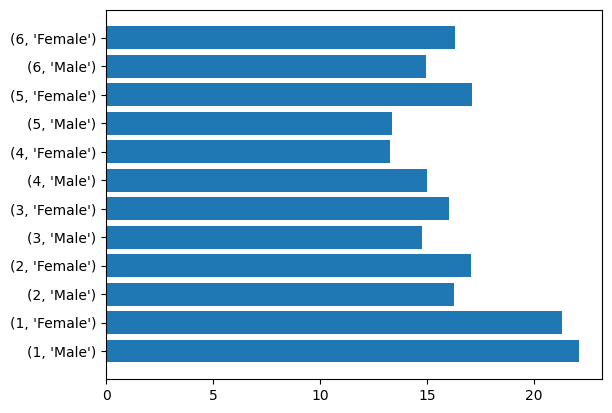

In [52]:
plt.barh(list_x, y)
plt.yticks(list_x, x)
plt.show()

In [162]:
group_data = tips.groupby(['인원', '성별']).mean()[['팁 비율']]
group_data

C:\Users\intco\AppData\Local\Temp\ipykernel_44716\2928806981.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_data = tips.groupby(['인원', '성별']).mean()[['팁 비율']]


팁 비율
인원 성별               
1  Male    22.093023
   Female  21.322912
2  Male    16.273796
   Female  17.053626
3  Male    14.763093
   Female  16.025679
4  Male    15.017047
   Female  13.267871
5  Male    13.371547
   Female  17.114094
6  Male    14.953486
   Female  16.306239

1. 남자의 팁 비율 데이터프레임 생성
2. 여자의 팁 비율 데이터프레임 생성
3. 2개의 데이터프레임을 시각화

In [161]:
## hint
group_data.index

## 멀티 인덱스에 성별 부분만 출력
for i in group_data.index:
    print(i[1])

Male
Female
Male
Female
Male
Female
Male
Female
Male
Female
Male
Female


In [129]:
sample = tips.set_index('총 금액')
sample.loc[:, '팁']

총 금액
17.0    1.0
10.3    1.7
21.0    3.5
23.7    3.3
24.6    3.6
       ... 
29.0    5.9
27.2    2.0
22.7    2.0
17.8    1.8
18.8    3.0
Name: 팁, Length: 244, dtype: float64

In [127]:
sample.iloc[1, :]

팁              1.7
성별            Male
흡연 여부           No
요일             Sun
시간          Dinner
인원               3
팁 비율     16.504854
Name: 10.3, dtype: object

In [99]:
sample.loc[10.3, :]

,팁,성별,흡연 여부,요일,시간,인원,팁 비율
총 금액,,,,,,,
10.3,1.7,Male,No,Sun,Dinner,3,16.504854
10.3,1.7,Male,No,Sun,Dinner,2,16.504854
10.3,1.7,Female,No,Sun,Dinner,3,16.504854
10.3,2.6,Female,No,Sun,Dinner,2,25.242718
10.3,2.0,Female,No,Thur,Lunch,2,19.417476
10.3,2.0,Male,Yes,Thur,Lunch,2,19.417476


In [164]:
## step1. 비어있는 데이터프레임 생성
male_data = pd.DataFrame()
female_data = pd.DataFrame()

## step2. for문을 이용하여 male인 경우 1을 출력, female인 경우 2를 출력
for i in group_data.index:
    if i[1] == 'Male':
        print(1)
    else:
        print(2)

1
2
1
2
1
2
1
2
1
2
1
2


In [168]:
## step3. for문에서 male인 경우 해당하는 인덱스의 데이터를 출력
## loc[인덱스 비교, 컬럼 비교]
## iloc[인덱스의 위치 비교, 컬럼의 위치 비교]
group_data.loc[(1, 'Male')]


## step4. for문에서 male, female인 경우 비어있는 데이터프레임에서 행 추가

팁 비율    22.093023
Name: (1, Male), dtype: float64

In [117]:
for i in group_data.index:
    if i[1] == 'Male':
        print(group_data.loc[i])
    else:
        print('female')

팁 비율    22.093023
Name: (1, Male), dtype: float64
female
팁 비율    16.273796
Name: (2, Male), dtype: float64
female
팁 비율    14.763093
Name: (3, Male), dtype: float64
female
팁 비율    15.017047
Name: (4, Male), dtype: float64
female
팁 비율    13.371547
Name: (5, Male), dtype: float64
female
팁 비율    14.953486
Name: (6, Male), dtype: float64
female


In [165]:
for i in group_data.index:
    data = group_data.loc[[i]]
    if i[1] == 'Male':
        male_data = pd.concat([male_data, data])
    else:
        female_data = pd.concat([female_data, data])

print(male_data)
print(female_data)

              팁 비율
인원 성별             
1  Male  22.093023
2  Male  16.273796
3  Male  14.763093
4  Male  15.017047
5  Male  13.371547
6  Male  14.953486
                팁 비율
인원 성별               
1  Female  21.322912
2  Female  17.053626
3  Female  16.025679
4  Female  13.267871
5  Female  17.114094
6  Female  16.306239


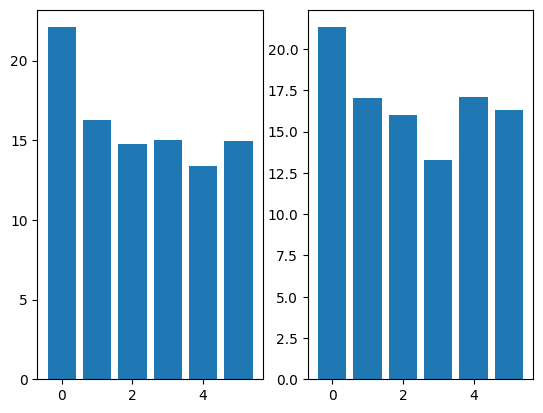

In [166]:
x1 = range(len(male_data.index))
x2 = range(len(female_data.index))
y1 = male_data['팁 비율']
y2 = female_data['팁 비율']

plt.subplot(1, 2, 1)
plt.bar(x1, y1)
plt.subplot(1, 2, 2)
plt.bar(x2, y2)

plt.show()

In [123]:
tips.index

for i in tips.index:
    if i % 10 == 0:
        print(i)

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240


In [125]:
tips.loc[[10]]

,총 금액,팁,성별,흡연 여부,요일,시간,인원,팁 비율
10,10.3,1.7,Male,No,Sun,Dinner,2,16.504854


In [133]:
tips.index

for i in tips.index:
    if i % 10 == 0:
        print(tips.loc[[i]])

   총 금액    팁      성별 흡연 여부   요일      시간  인원      팁 비율
0  17.0  1.0  Female    No  Sun  Dinner   2  5.882353
    총 금액    팁    성별 흡연 여부   요일      시간  인원       팁 비율
10  10.3  1.7  Male    No  Sun  Dinner   2  16.504854
    총 금액    팁    성별 흡연 여부   요일      시간  인원       팁 비율
20  17.9  4.1  Male    No  Sat  Dinner   2  22.905028
    총 금액    팁    성별 흡연 여부   요일      시간  인원       팁 비율
30   9.6  1.4  Male    No  Sat  Dinner   2  14.583333
    총 금액    팁    성별 흡연 여부   요일      시간  인원   팁 비율
40  16.0  2.2  Male    No  Sat  Dinner   3  13.75
    총 금액    팁    성별 흡연 여부   요일      시간  인원  팁 비율
50  12.5  2.5  Male    No  Sun  Dinner   2  20.0
    총 금액    팁    성별 흡연 여부   요일      시간  인원       팁 비율
60  20.3  3.2  Male   Yes  Sat  Dinner   2  15.763547
    총 금액    팁    성별 흡연 여부   요일      시간  인원       팁 비율
70  12.0  2.0  Male    No  Sat  Dinner   2  16.666667
    총 금액    팁    성별 흡연 여부    요일     시간  인원       팁 비율
80  19.4  3.0  Male   Yes  Thur  Lunch   2  15.463918
    총 금액    팁    성별 흡연 여부   요일      시간  인원    

In [148]:
test_df = pd.DataFrame()
test2_df = pd.DataFrame()

for i in tips.index:
    if i % 10 == 0:
        test_df = pd.concat([test_df, tips.loc[[i]]])
    if i % 50 == 0:
        test2_df = pd.concat([test2_df, tips.loc[[i]]])

In [136]:
test_df

,총 금액,팁,성별,흡연 여부,요일,시간,인원,팁 비율
0,17.0,1.0,Female,No,Sun,Dinner,2,5.882353
10,10.3,1.7,Male,No,Sun,Dinner,2,16.504854
20,17.9,4.1,Male,No,Sat,Dinner,2,22.905028
30,9.6,1.4,Male,No,Sat,Dinner,2,14.583333
40,16.0,2.2,Male,No,Sat,Dinner,3,13.750000
50,12.5,2.5,Male,No,Sun,Dinner,2,20.000000
60,20.3,3.2,Male,Yes,Sat,Dinner,2,15.763547
70,12.0,2.0,Male,No,Sat,Dinner,2,16.666667
80,19.4,3.0,Male,Yes,Thur,Lunch,2,15.463918
90,29.0,3.0,Male,Yes,Fri,Dinner,2,10.344828


In [149]:
test2_df

,총 금액,팁,성별,흡연 여부,요일,시간,인원,팁 비율
0,17.0,1.0,Female,No,Sun,Dinner,2,5.882353
50,12.5,2.5,Male,No,Sun,Dinner,2,20.000000
100,11.4,2.5,Female,Yes,Fri,Dinner,2,21.929825
150,14.1,2.5,Male,No,Sun,Dinner,2,17.730496
200,18.7,4.0,Male,Yes,Thur,Lunch,3,21.390374


[0, 1, 2, 3, 4]

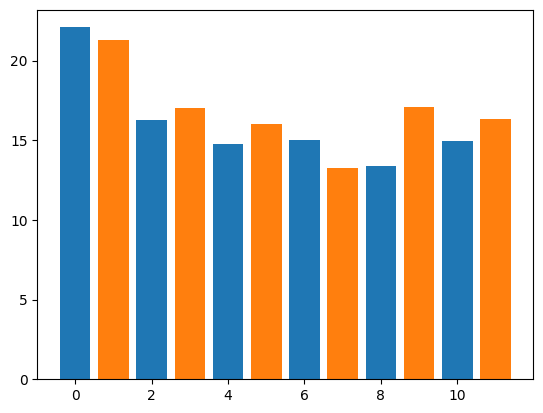

In [173]:
x1 = range(0, len(male_data.index)*2 ,2)
x2 = range(1, len(female_data.index)*2, 2)

plt.bar(x1, y1)
plt.bar(x2, y2)
plt.show()